In [2]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv("uber_data.csv")
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [4]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

In [5]:
data.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [6]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [7]:
data['Date/Time'].dt.day.head()

0    1
1    1
2    1
3    1
4    1
Name: Date/Time, dtype: int64

In [8]:
def get_dom(d):
    return d.day
data['dom'] = data['Date/Time'].map(get_dom)

In [9]:
d = data['Date/Time'][0]
d.day

1

In [10]:
# Forget what he did, this is much better...
data['weekday'] = data['Date/Time'].dt.weekday
data['hour'] = data['Date/Time'].dt.hour
data.head()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0


In [11]:
data.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


# Analyze the Month

Text(0.5, 1.0, 'Frequency by DoM - Uber - April 2014')

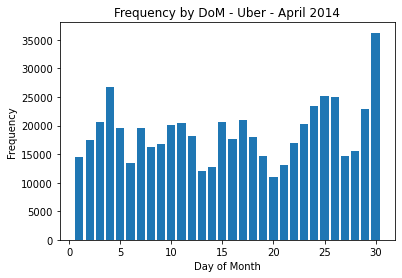

In [16]:
hist(data.dom, bins=30, rwidth=.8, range=(0.5, 30.5))
xlabel('Day of Month')
ylabel('Frequency')
title('Frequency by DoM - Uber - April 2014')

In [17]:
for k,rows in data.groupby('dom'):
    print(k, len(rows))

1 14546
2 17474
3 20701
4 26714
5 19521
6 13445
7 19550
8 16188
9 16843
10 20041
11 20420
12 18170
13 12112
14 12674
15 20641
16 17717
17 20973
18 18074
19 14602
20 11017
21 13162
22 16975
23 20346
24 23352
25 25095
26 24925
27 14677
28 15475
29 22835
30 36251


In [34]:
# could also do...
data.dom.value_counts().sort_index()

1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
Name: dom, dtype: int64

In [30]:
data.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dom                   int64
weekday               int64
hour                  int64
dtype: object

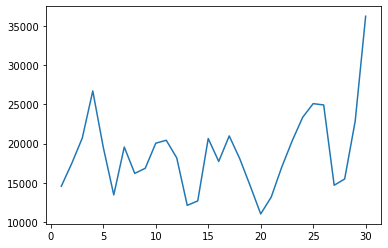

In [35]:
byDate = data.dom.value_counts().sort_index()
plot(byDate)

<BarContainer object of 30 artists>

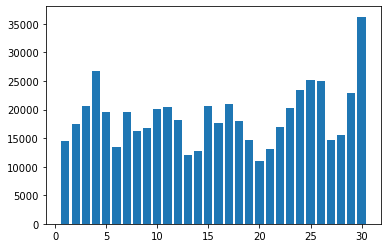

In [36]:
bar(range(1, 31), byDate)

In [37]:
byDateSorted = data.dom.value_counts().sort_values()

([<matplotlib.axis.XTick at 0x7fd8ea37f580>,
 [Text(1, 0, '20'),
  Text(2, 0, '13'),
  Text(3, 0, '14'),
  Text(4, 0, '21'),
  Text(5, 0, '6'),
  Text(6, 0, '1'),
  Text(7, 0, '19'),
  Text(8, 0, '27'),
  Text(9, 0, '28'),
  Text(10, 0, '8'),
  Text(11, 0, '9'),
  Text(12, 0, '22'),
  Text(13, 0, '2'),
  Text(14, 0, '16'),
  Text(15, 0, '18'),
  Text(16, 0, '12'),
  Text(17, 0, '5'),
  Text(18, 0, '7'),
  Text(19, 0, '10'),
  Text(20, 0, '23'),
  Text(21, 0, '11'),
  Text(22, 0, '15'),
  Text(23, 0, '3'),
  Text(24, 0, '17'),
  Text(25, 0, '29'),
  Text(26, 0, '24'),
  Text(27, 0, '26'),
  Text(28, 0, '25'),
  Text(29, 0, '4'),
  Text(30, 0, '30')])

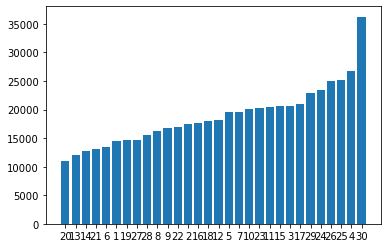

In [39]:
bar(range(1, 31), byDateSorted)
xticks(range(1,31), byDateSorted.index)

# Analyze the Hour

(array([ 7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924., 22843.,
        17939., 17865., 18774., 19425., 22603., 27190., 35324., 42003.,
        45475., 43003., 38923., 36244., 36964., 30645., 20649.,     0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <BarContainer object of 24 artists>)

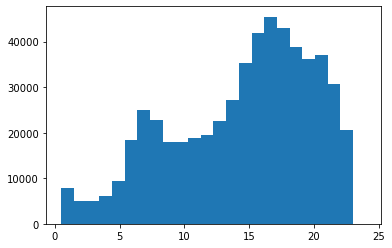

In [41]:
hist(data.hour, bins=24, range=(0.5,24))

# Analyze the Weekday

([<matplotlib.axis.XTick at 0x7fd8e9601f40>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tues'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thurs'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

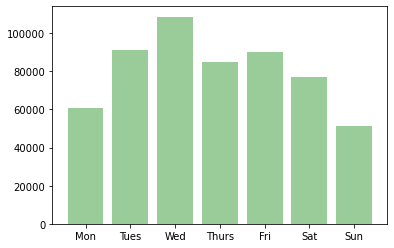

In [50]:
hist(data.weekday, bins=7, range=(-.5,6.5), rwidth=.8, color='green', alpha=0.4)
xticks(range(7), 'Mon Tues Wed Thurs Fri Sat Sun'.split())

# cross analysis (hour, dow)

In [53]:
len(data)

564516

In [59]:
by_cross = data.groupby('weekday hour'.split()).apply(len).unstack()
by_cross

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


<AxesSubplot:xlabel='hour', ylabel='weekday'>

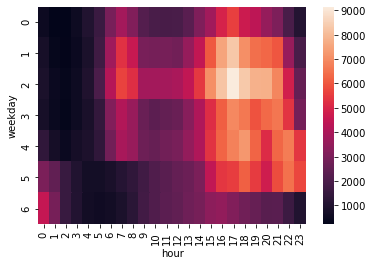

In [60]:
sns.heatmap(by_cross)

# By lat and lon

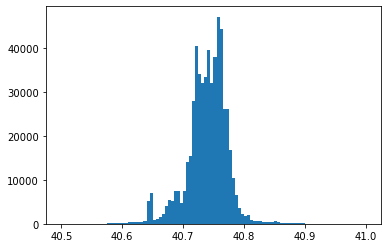

In [64]:
hist(data.Lat, bins=100, range=(40.5,41));

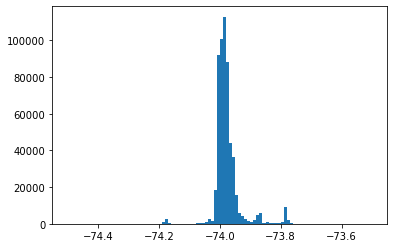

In [65]:
hist(data.Lon, bins=100, range=(-74.5,-73.5));

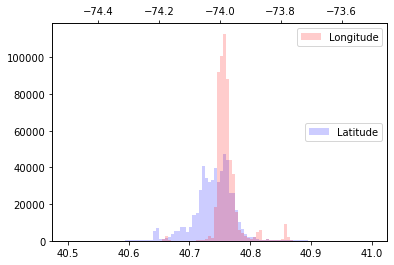

In [84]:
hist(data.Lat, bins=100, range=(40.5,41), color='b', alpha=.2, label='Latitude')
legend(loc='right')
twiny()
hist(data.Lon, bins=100, range=(-74.5,-73.5), color='r', alpha=.2, label='Longitude')
legend();

(0.0, 100.0)

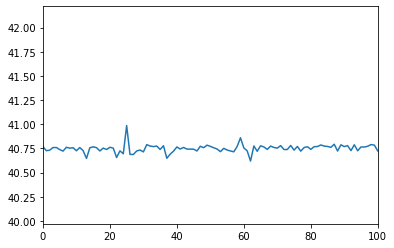

In [86]:
plot(data.Lat)
xlim(0,100)

(40.7, 41.0)

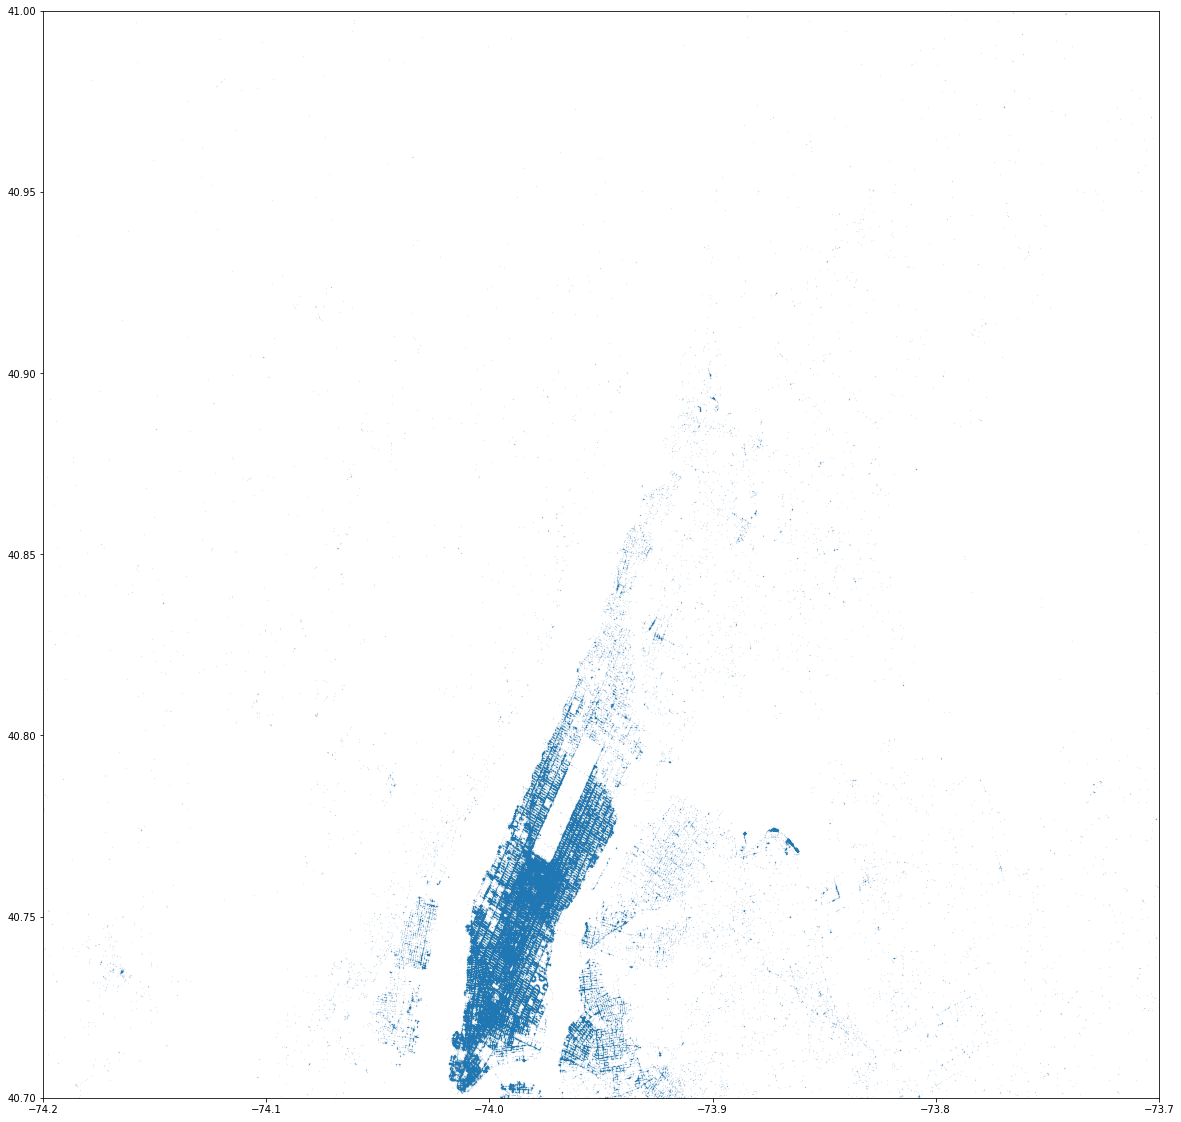

In [105]:
figure(figsize=(20,20))
plot(data.Lon, data.Lat, '.', ms=.2, alpha=.5)
xlim(-74.2, -73.7)
ylim(40.7, 41)